<a href="https://colab.research.google.com/github/Vasudev-SN/MPEA_dataset/blob/master/CNN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
num_class=10
input_shape=(28,28,1)

In [5]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
x_test.shape

(10000, 28, 28)

In [21]:
x_train.shape

(60000, 28, 28, 1)

In [22]:
x_train.ndim

4

In [7]:
import matplotlib.pyplot as plt

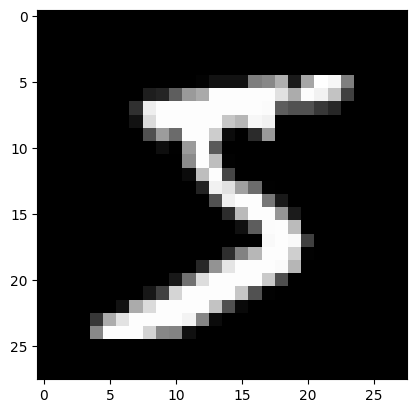

In [8]:
plt.imshow(x_train[0],cmap='gray')

In [11]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

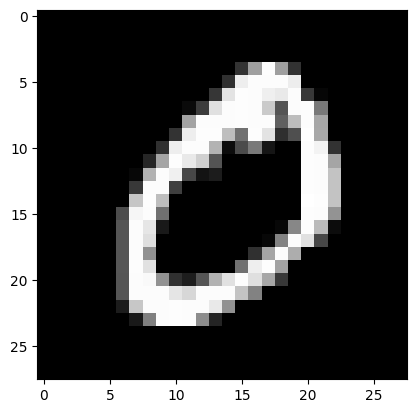

In [10]:
plt.imshow(x_train[1],cmap='gray')

In [12]:
x_train=x_train.astype('float')/255
x_test=x_test.astype('float')/255

In [13]:
x_train.shape

(60000, 28, 28)

In [15]:
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)

In [19]:
x_train.shape

(60000, 28, 28, 1)

In [20]:
x_train.ndim

4

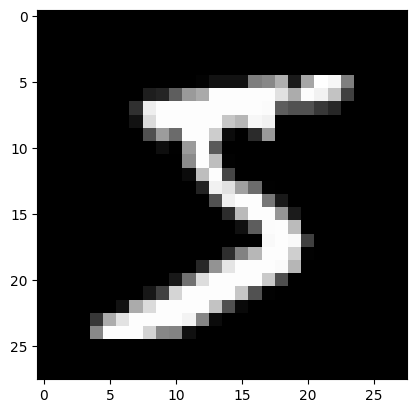

In [18]:
plt.imshow(x_train[0],cmap='gray');

In [24]:
num_class=10
y_train=keras.utils.to_categorical(y_train,num_class)
y_test=keras.utils.to_categorical(y_test,num_class)

In [25]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [30]:
input_shape=(28,28,1)
model=keras.Sequential([
    keras.Input(shape=input_shape),
    layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(50,activation='relu'),
    layers.Dense(10,activation='softmax')



])

In [31]:
batch_size=128
epochs=10
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

In [32]:
model.fit(x_train,y_train,batch_size=batch_size,epochs=2)

Epoch 1/2
469/469 [==============================] - 47s 96ms/step - loss: 0.3797 - accuracy: 0.8875
Epoch 2/2
469/469 [==============================] - 43s 91ms/step - loss: 0.1081 - accuracy: 0.9673


In [34]:
score=model.evaluate(x_test,y_test,verbose=1)
print('Test_score:',score[0])
print('Test_accuracy:',score[0]*100)

313/313 [==============================] - 4s 11ms/step - loss: 0.0960 - accuracy: 0.9711
Test_score: 0.09599136561155319
Test_accuracy: 9.59913656115532
